Hello, I'm an example Jupyter Notebook!

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats
import random
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [72]:
# This is some python code
print("Abeto Mengistu")

Abeto Mengistu


In [73]:
df = pd.read_csv("possum.csv")

In [74]:
df.head()
df = df.dropna()

In [75]:
x = df["hdlngth"]
y = df["totlngth"]

In [76]:
# x = np.array(x).reshape(-1, 1)
# y = np.array(y)

In [77]:
def linear_line(x, m, b):
    y = m*x + b
    return y

In [78]:
opt, cov = curve_fit(linear_line, x, y)

print(opt)
print(cov)


[ 0.79959396 13.12240485]
[[ 7.91115482e-03 -7.33606885e-01]
 [-7.33606885e-01  6.81248574e+01]]


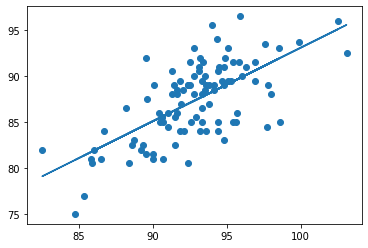

In [79]:
plt.scatter(x, y)

plt.plot(x, linear_line(x, opt[0], opt[1]))

1. It describes the data well because it shows all the data points while giving us a line of best fit to show a general trend.

2. I would say that it would make it more accurate because the more specific you make the variables the more accurate the answer will be.

In [80]:
train, test=train_test_split(df,test_size=0.2,random_state=1010)

x = train[['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].values
y = train['totlngth'].values


test_x = test[['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].values
test_y = test['totlngth'].values


In [81]:
from sklearn.linear_model import Lasso

In [82]:
lasso = Lasso(alpha=1)
lasso.fit(x, y)

Lasso(alpha=1)

In [83]:
print(lasso.coef_)

[0.         0.44701549 0.         0.8484904  0.32963596 0.
 0.         0.         0.        ]


3. The top three clasifiers are headlength, skull width, and tail length.

In [84]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [85]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

In [86]:
logreg = LogisticRegression()


In [87]:
df['sex_num'] = df['sex'].replace(['m', 'f'],
                        [0, 1], inplace=False)

In [ ]:
df.head()

In [89]:
y_num = ['sex_num']

In [90]:
train, test=train_test_split(df,test_size=0.2,random_state=1010)

x = train[['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].values
y_num = train['sex_num'].values
x_log = train[['hdlngth']]


test_x = test[['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].values
test_x_1 = test[['hdlngth']].values
test_y = test['sex_num'].values
x_test_log = test['hdlngth']


In [91]:
logreg.fit(x_log,y_num)

LogisticRegression()

In [92]:
x_line = np.linspace(30,110,1000)
y_line = x_line * logreg.coef_ + logreg.intercept_

In [93]:
sigmoid = expit(y_line)

Text(0, 0.5, 'test_y')

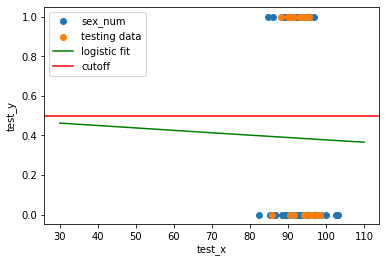

In [94]:
plt.scatter(x_log, y_num, label="sex_num")
plt.scatter(x_test_log, test_y, label="testing data")
plt.plot(x_line,sigmoid.ravel(),c="green", label = "logistic fit")
plt.axhline(.5, color="red", label="cutoff")
plt.legend()
plt.xlabel("test_x")
plt.ylabel("test_y")

In [95]:
y_pred = logreg.predict(test_x_1)

/workspace/.pyenv_mirror/user/3.8.13/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [96]:
conf_matrix = metrics.confusion_matrix(test_y, y_pred)
print(conf_matrix)

[[10  0]
 [11  0]]


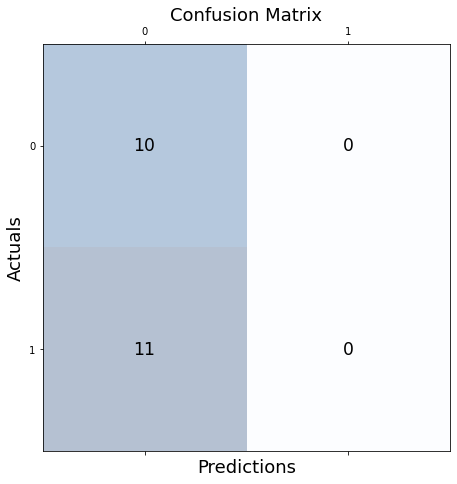

In [97]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [98]:
conf_matrix = metrics.confusion_matrix(test_y, y_pred)
print(conf_matrix)

[[10  0]
 [11  0]]


In [99]:
from sklearn.linear_model import Lasso

In [100]:
lasso = Lasso(alpha=0.1)
lasso.fit(x, y_num)

Lasso(alpha=0.1)

In [101]:
lasso_train= lasso.predict(x)
lasso_test= lasso.predict(test_x)

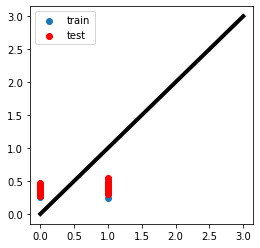

In [102]:
plt.figure(figsize=(4,4))

plt.scatter(y_num,lasso_train, label='train')
plt.scatter(test_y,lasso_test,color='r', label='test')
plt.plot([0,3],[0,3],lw=4,color='black')
plt.legend()

In [110]:
conf_matrix = metrics.confusion_matrix(test_y, y_pred)
print(conf_matrix)

[[10  0]
 [11  0]]


In [103]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor


In [104]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x, y_num)

KNeighborsRegressor(n_neighbors=3)

In [105]:
knn_train=knn.predict(x)
knn_test=knn.predict(test_x)

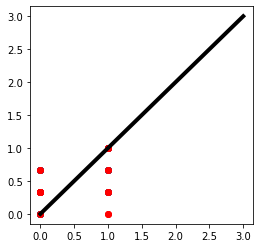

In [106]:
plt.figure(figsize=(4,4))

plt.scatter(y_num,knn_train)
plt.scatter(test_y,knn_test,color='r')
plt.plot([0,3],[0,3],lw=4,color='black')

In [107]:
y_pred = logreg.predict(test_x_1)

/workspace/.pyenv_mirror/user/3.8.13/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [108]:
conf_matrix = metrics.confusion_matrix(test_y, y_pred)
print(conf_matrix)

[[10  0]
 [11  0]]


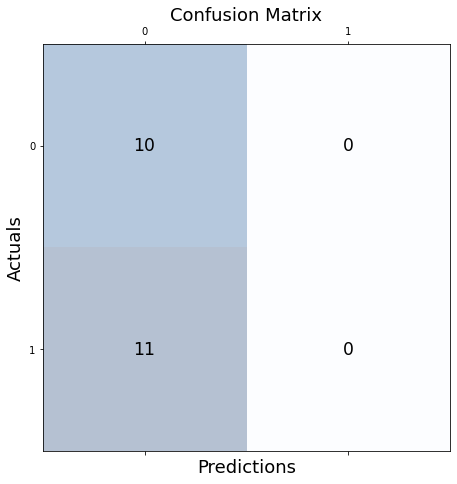

In [109]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

4. They both work exactly the same.
5. I think that the confusion matrices are the exact same.

In [166]:
df['pop_num'] = df['Pop'].replace(['Vic', 'other'],
                        [0, 1], inplace=False)


train, test=train_test_split(df,test_size=0.2,random_state=1010)

x_train = train[['age', 'totlngth', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].values
y_train = train['pop_num'].values


x_test = test[['age', 'totlngth', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].values
y_test = test['pop_num'].values

In [175]:
from sklearn import tree
from sklearn.metrics import mean_squared_error
import seaborn as sns
dt = tree.DecisionTreeRegressor(max_depth=4)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [176]:
dt_train=dt.predict(x_train)
dt_test=dt.predict(x_test)

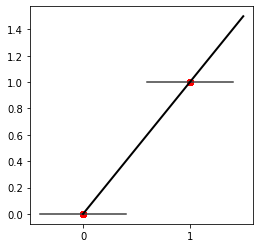

In [177]:
plt.figure(figsize=(4,4))
sns.violinplot(x=y_train,y=dt_train,data=df, xlim=[0,3])
plt.scatter(y_train,dt_train,color='r')
plt.plot([0,1.5],[0,1.5],lw=2,color='black')

In [178]:
print(r2_score(y_train, dt_train))
print(mean_squared_error(y_train, dt_train))

1.0
0.0


In [179]:
lasso = Lasso(alpha=0.005)
lasso.fit(x_train, y_train)
print(lasso.coef_)

[-0.0187587  -0.01685633  0.03083427  0.00691331  0.06546077 -0.03268887
 -0.07076696 -0.         -0.01825379  0.        ]


6. The regression tree is more accurate than kmeans at guessing collection site location.

7. the properties that are most important for an accurate prediction is earcounch, skull width, and tail length

8. These data can be used to classified into these categories well because on the regression tree the predictions were very accurate with these data points.